<a href="https://colab.research.google.com/github/Patricia1501/LetsGrowMore-Data-Science-Internship/blob/main/Task_1(Advanced_Level)Develop_A_Neural_Network_That_Can_Read_Handwriting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LetsGrowMore Internship(Advanced Level)

### <b><u><center>Task 1-Develop A Neural Network That Can Read Handwriting</b></u></center>

In this machine learning project, we will recognize handwritten characters, i.e, alphabets or digits. This we are going to achieve by modeling a neural network that will have to be trained over a dataset containing images of alphabets or digits.

In [1]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = load_data()

# reshaping the training and testing data
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],
x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# normalizing the values of pixels of images
x_train = x_train.astype('float32') / 255.0 
x_test= x_test.astype('float32') / 255.0

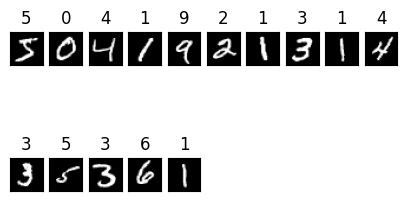

In [4]:
fig = plt.figure(figsize=(5,3))
for i in range(15):
  ax = fig.add_subplot (2,10, i+1, xticks=[], yticks=[]) 
  ax.imshow(np.squeeze (x_train[i]), cmap='gray') 
  ax.set_title(y_train[i])

In [5]:
# determine the shape of input images
img_shape = x_train.shape[1:] 
print(img_shape)

(28, 28, 1)


In [6]:
# defining the model
model = Sequential()
model.add(Conv2D (32, (3,3), activation='relu', input_shape=img_shape)) 
model.add(MaxPool2D((2, 2)))
model.add(Conv2D (48, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout (0.5))
model.add(Flatten())
model.add(Dense (500, activation= 'relu'))
model.add(Dense (10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

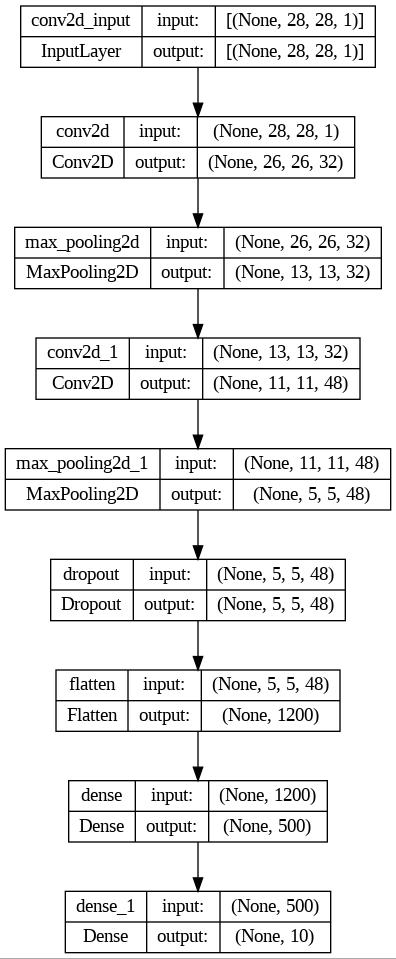

In [8]:
plot_model(model, 'model.jpg', show_shapes=True)

In [16]:
epochs = range(10)

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x=model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 50s - loss: 0.2464 - accuracy: 0.9249 - val_loss: 0.0529 - val_accuracy: 0.9848 - 50s/epoch - 118ms/step
Epoch 2/10
422/422 - 48s - loss: 0.0836 - accuracy: 0.9741 - val_loss: 0.0459 - val_accuracy: 0.9872 - 48s/epoch - 113ms/step
Epoch 3/10
422/422 - 49s - loss: 0.0607 - accuracy: 0.9810 - val_loss: 0.0338 - val_accuracy: 0.9915 - 49s/epoch - 116ms/step
Epoch 4/10
422/422 - 48s - loss: 0.0486 - accuracy: 0.9847 - val_loss: 0.0346 - val_accuracy: 0.9905 - 48s/epoch - 114ms/step
Epoch 5/10
422/422 - 47s - loss: 0.0416 - accuracy: 0.9865 - val_loss: 0.0286 - val_accuracy: 0.9922 - 47s/epoch - 112ms/step
Epoch 6/10
422/422 - 48s - loss: 0.0386 - accuracy: 0.9878 - val_loss: 0.0332 - val_accuracy: 0.9892 - 48s/epoch - 113ms/step
Epoch 7/10
422/422 - 46s - loss: 0.0324 - accuracy: 0.9896 - val_loss: 0.0332 - val_accuracy: 0.9898 - 46s/epoch - 109ms/step
Epoch 8/10
422/422 - 47s - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0328 - val_accuracy: 0.9903 - 47s/epoch - 112

In [18]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0) 
print (f'Accuracy: {accuracy*100}')

Accuracy: 99.22000169754028


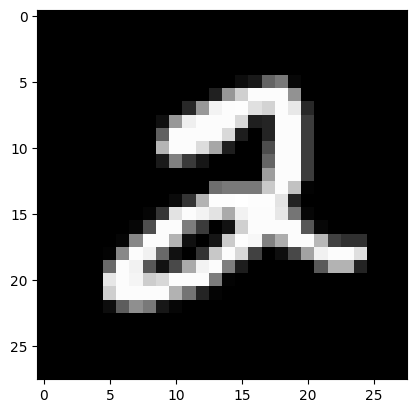

In [19]:
image = x_train[5]

# lets display the image which we want to predict 
plt.imshow(np.squeeze (image), cmap='gray') 
plt.show()

In [20]:
image = image.reshape(1,image.shape[0], image.shape[1], image.shape[2]) 
p = model.predict([image]) 
print('Predicted: {}'.format(argmax(p)))

1/1 [==============================] - 0s 110ms/step
Predicted: 2
